# 1. Import Library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

# 2. Read in Data

In [14]:
# Read in data
df = pd.read_csv('Reviews_data.csv')

In [15]:
# display col, rol number
print(df.shape)
df = df.head(500)
print(df.shape)

(999, 10)
(500, 10)


In [16]:
# Dislay col, row
list(df.columns.values)

['Id',
 'ProductId',
 'UserId',
 'ProfileName',
 'HelpfulnessNumerator',
 'HelpfulnessDenominator',
 'Score',
 'Time',
 'Summary',
 'Text']

Id - Id của bảng
ProductId - id của sản phẩm
UserId - id của người dùng
ProfileName : tên của người dùng
HelpfulnessNumerator - số lượng người dùng thấy bài đánh giá hữu ích
HelpfulnessDenominator - số người dùng cho biết bài đánh giá hữu ích hay không
Score - điểm đánh giá từ 1-5
Time - thời gian đánh giá
Summary - tóm tắt về đánh giá
Text - đoạn đánh giá

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


# 3. Quick EDA

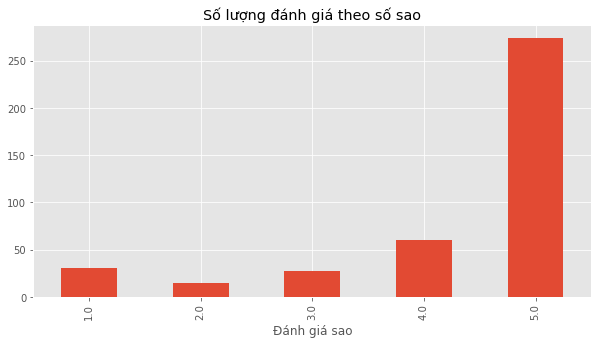

In [18]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Số lượng đánh giá theo số sao',
          figsize=(10, 5))
ax.set_xlabel('Đánh giá sao')
plt.show()

# 4. Basic NLTK

In [17]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [19]:
# chia các chuỗi thành các danh sách con 
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [24]:
# trình gắn thẻ POS , xử lý một chuỗi các từ và đính kèm một phần của thẻ lời nói vào mỗi từ
# https://www.guru99.com/pos-tagging-chunking-nltk.html
#Phần trình gắn thẻ - NN danh từ, số ít (mèo, cây)
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

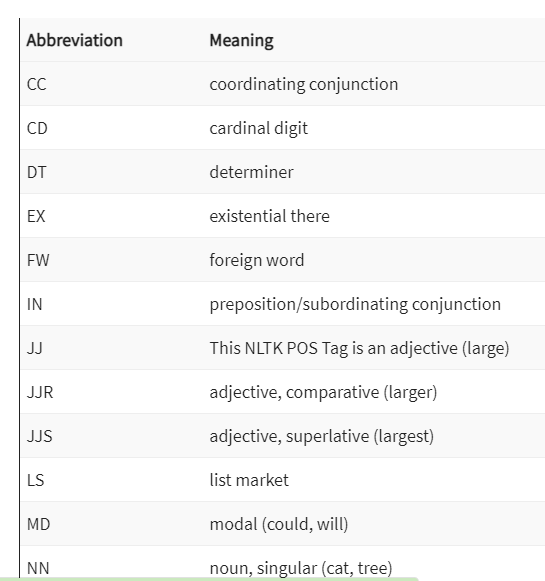

In [23]:
from IPython.display import Image
Image(filename='Pos_tag.png') 

In [25]:
# Tách thành các đoạn nhỏ
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# 5. Clean Data

In [27]:
import re
first_description=df.Text[0]
description=re.sub("[^a-zA-Z]"," ",first_description) 
description=description.lower()

In [6]:
print(df.Text[0])
print(description)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 


In [29]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [43]:
df1.dtypes

Id                        float64
ProductId                  object
UserId                     object
ProfileName                object
HelpfulnessNumerator      float64
HelpfulnessDenominator    float64
Score                     float64
Time                      float64
Summary                    object
Text                       object
dtype: object

In [41]:
df1 = pd.read_csv('Reviews_data1.csv')

In [42]:
df1.shape

(999, 10)

In [45]:
df1.isna().sum()

Id                        87
ProductId                 87
UserId                    87
ProfileName               87
HelpfulnessNumerator      87
HelpfulnessDenominator    87
Score                     87
Time                      87
Summary                   87
Text                      93
dtype: int64

In [47]:
df1.dropna(inplace = True)

In [48]:
df1.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [49]:
df1.shape

(906, 10)

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
sorted_data=df1.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [52]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(905, 10)

In [53]:
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30.0,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5.0,1.107821e+09,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
252,253.0,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0.0,0.0,1.0,1.344557e+09,Sad outcome,"Five minutes in, one tentacle was bitten off, ..."
187,188.0,B00029XIZI,A2S72TUJDQUBMH,Nadia,0.0,0.0,5.0,1.236125e+09,Miracle,My Scotties were full of hot spots and when I ...
971,972.0,B0002XIB2Y,A1891H0TIXLDXA,Donald M. Bridges,1.0,2.0,5.0,1.250294e+09,Pioneer Gravy is GREAT!,I have used Pioneer Gravy for a number of year...
970,971.0,B0002XIB2Y,A2DRQBOGCTC5HP,"TL ""TerryLea""",2.0,3.0,5.0,1.191715e+09,Best white gravy !,Nothing easier. Nothing better. Even beats gra...
...,...,...,...,...,...,...,...,...,...,...
766,767.0,B009HINRX8,ATNQNZEHWMR9U,Kokopelli,0.0,0.0,3.0,1.337386e+09,Note: Rating both coffee and seller,"This coffee is good but, for me, it's nothing ..."
765,766.0,B009HINRX8,A39BLB42U7M6BD,James Brooks,0.0,0.0,4.0,1.344643e+09,One of the better T-Discs,I have tried about 75% of the available T-Disc...
763,764.0,B009HINRX8,ADDBLG0CFY9AI,S.A.D.,1.0,1.0,5.0,1.326758e+09,Best of the Tassimo's,We've tried many Tassimo flavors. This is by ...
762,763.0,B009HINRX8,A3N9477PUE6WMR,patc477,4.0,4.0,5.0,1.323302e+09,Good Tasting cup o' joe,This is a bold blend that has a great taste. T...


# 6. Vader Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) là một công cụ phân tích cảm xúc dựa trên quy tắc và từ vựng, đặc biệt phù hợp với cảm xúc được thể hiện trên mạng xã hội .

Sử dụng tình cảm của NLTK để có được điểm số NEG/NEU/POS của văn bản.

- Điều này sử dụng cách tiếp cận "bag of words": 
+ stop words được xóa

+ Mỗi từ score và kết hợp với total score.

=> lấy tất cả các từ trong câu và nó có thể có giá trị một là tich cực/ tiêu cực/trung lập cho mỗi từ đó
.Tiếp theo là kết hợp nó lại với nhau và nó sẽ thực hiện phương trình toán học. Đối với tất cả các từ nó sẽ cộng lại để cho bạn biết mức độ tích cực hay tiêu cực hay trung lập

In [105]:
df4 = pd.read_csv('Reviews_data_2.csv')
#print(df4.shape)
#df4 = df4.head(500)
print(df4.shape)

In [100]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [101]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [56]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [102]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [59]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [106]:
# Chạy điểm phân cực trên toàn bộ tập dữ liệu
res = {}
for i, row in tqdm(df4.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/999 [00:00<?, ?it/s]

In [107]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [108]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
995,0.000,0.828,0.172,0.7552
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634


In [109]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [76]:
# Bây giờ có điểm số tình cảm và dữ liệu sau khi hợp nhất
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,30.0,0.017,0.846,0.137,0.9746,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5.0,1.107821e+09,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
1,253.0,0.107,0.893,0.000,-0.4767,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0.0,0.0,1.0,1.344557e+09,Sad outcome,"Five minutes in, one tentacle was bitten off, ..."
2,188.0,0.000,0.824,0.176,0.6983,B00029XIZI,A2S72TUJDQUBMH,Nadia,0.0,0.0,5.0,1.236125e+09,Miracle,My Scotties were full of hot spots and when I ...
3,972.0,0.000,0.666,0.334,0.9003,B0002XIB2Y,A1891H0TIXLDXA,Donald M. Bridges,1.0,2.0,5.0,1.250294e+09,Pioneer Gravy is GREAT!,I have used Pioneer Gravy for a number of year...
4,971.0,0.040,0.766,0.194,0.7529,B0002XIB2Y,A2DRQBOGCTC5HP,"TL ""TerryLea""",2.0,3.0,5.0,1.191715e+09,Best white gravy !,Nothing easier. Nothing better. Even beats gra...


Kết quả biểu đồ Vader

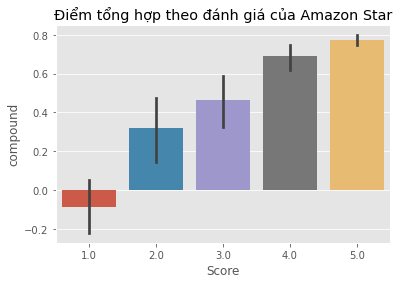

In [110]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Điểm tổng hợp theo đánh giá của Amazon Star')
plt.show()

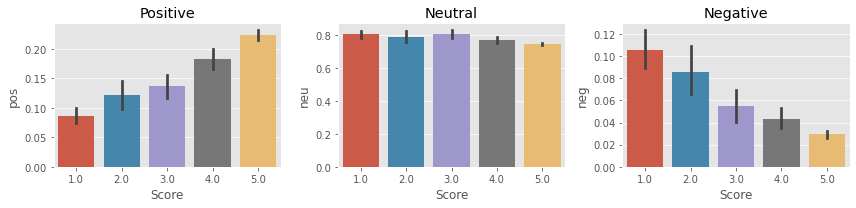

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# 7. Roberta Pretrained Model

In [20]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [112]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [117]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

In [118]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [128]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.


In [126]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

ImportError: Unable to convert output to PyTorch tensors format, PyTorch is not installed.

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')